In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn
import Plotting as plot
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas import Series, DataFrame
# %matplotlib notebook
plt.style.use('ggplot')

Welcome to ROOTaaS 6.06/08


In [2]:

#---------------------------------------------------------------------
#TEST USING QUANTILE REGRESSION ON EB/EE DATA SEPARATELY AND UNIFIED AFTERWARDS, WITH AND WITHOUT WEIGHTS
#---------------------------------------------------------------------


In [3]:
# Variable you want to correct
ylist = ["R9"]#, "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi", "SigmaRR", 'CovarianceIetaIphi', 'PhoIso03', 'ChIso03', 'ChIso03worst']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
# Set the quantiles 
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [4]:
# Upload Dataframes:
qr_mc1= quantileRegression("mc")
qr_mc2= quantileRegression("mc")
print "Load the mc dataframe"
qr_mc1.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_NoPu.h5", 0, -1)
qr_mc2.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_NoPu.h5", 0, -1)
#-------------------------------------------------------------
qr_data = quantileRegression("data")
print "Load the data dataframe"
qr_data.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_NoPu2.h5", 0, -1)
dfdata = qr_data.getDF()
qr_dataH = quantileRegression("data")
startEvtdata = 0
stopEvtdata   = 2000000
print "Load the data dataframe"
qr_dataH.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_NoPu5.h5", 0, -1)
dfdataH = qr_dataH.getDF()

Load the mc dataframe
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_NoPu.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_NoPu.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Load the data dataframe
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_NoPu2.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Load the data dataframe
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_NoPu5.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000


In [5]:
print "Get the corrected data-mc values"
import pandas as pd
qr_mc1.correctAllY(X, ylist, quantiles,EBEE="EB", relativePath= "weights_Period_NoPu_2")
qr_mc2.correctAllY(X, ylist, quantiles,EBEE="EE", relativePath= "weights_Period_NoPu_2")

dfmc1= qr_mc1.getDF()
dfmc2= qr_mc2.getDF()
frame2 = [dfmc1, dfmc2]
data2 = pd.concat(frame2)
dfmc = data2.reset_index()       

Get the corrected data-mc values
Corrected variables file (e.g.  correctedTargetsweights_Period_NoPu_2_EB.h5  ) does not exists. This will take a while...
Correct EB :
-1.4442  <  ScEta  and  ScEta  <  1.4442
Loading mc weights for  R9  : 
    ./weights/weights_Period_NoPu_2/mc_weights_EB
Loading data weights for  R9
    ./weights/weights_Period_NoPu_2/data_weights_EB
Get corrections for  R9  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  R9
Writing correctedTargets_ EB R9 .h5
Corrected variables file (e.g.  correctedTargetsweights_Period_NoPu_2_EE.h5  ) does not exists. This will take a while...
Correct EE :
ScEta  <  -1.57  or  1.57  <  ScEta
Loading mc weights for  R9  : 
    ./weights/weights_Period_NoPu_2/mc_weights_EE
Loading data weights for  R9
    ./weights/weights_Period_NoPu_2/data_weights_EE
Get corrections for  R9  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'Sc

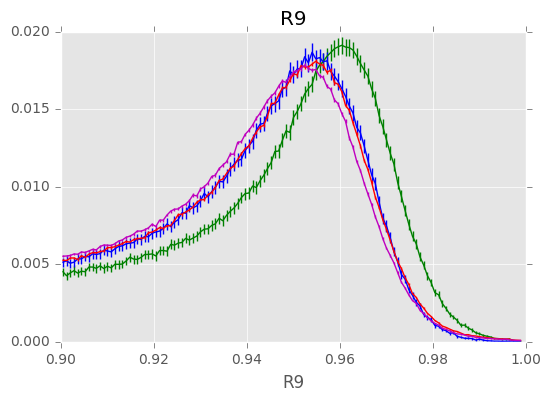

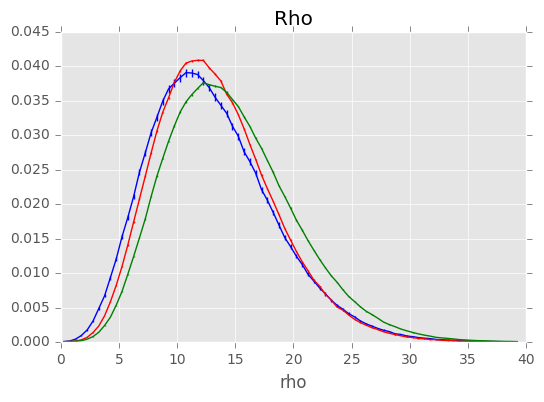

In [6]:
rv2 = np.arange(0.9,1.0,0.0008)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("R9")
plot.plotHistErr(dfmc["R9"], rv2,Weight=dfmc["weight"], Color="g")    
plot.plotHistErr(dfmc["R9_corr"], rv2,Weight=dfmc["weight"], Color="b")
plot.plotHistErr(dfdata["R9"], rv2, Color="r", Weight=dfdata["weight"])
plot.plotHistErr(dfdataH["R9"], rv2, Color="m")

ax.set_title('R9')

rv=np.arange(0,40,0.5)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("rho")
    
plot.plotHistErr(dfmc["rho"], rv,Weight=dfmc["weight"], Color="b")
plot.plotHistErr(dfdata["rho"], rv, Color="r", Weight=dfdata["weight"])
plot.plotHistErr(dfdataH["rho"], rv, Color="g")

ax.set_title('Rho')

plotting  R9


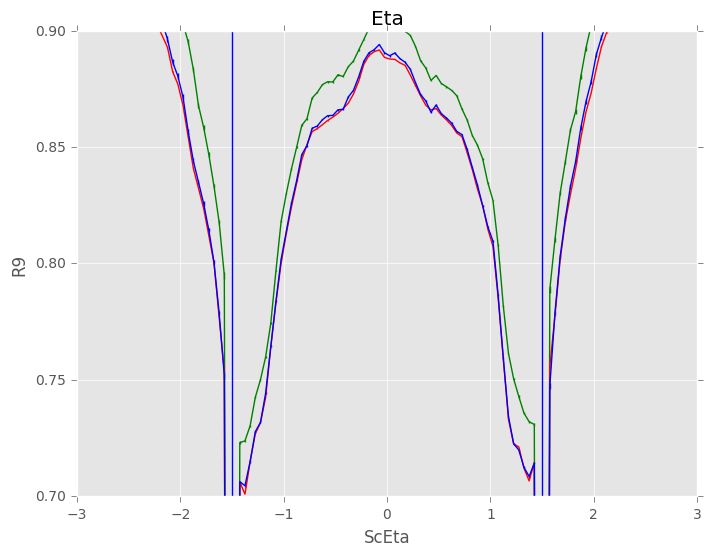

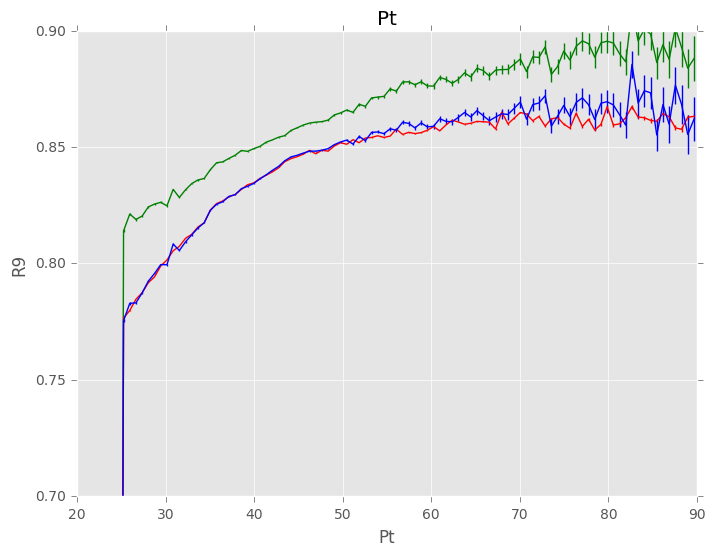

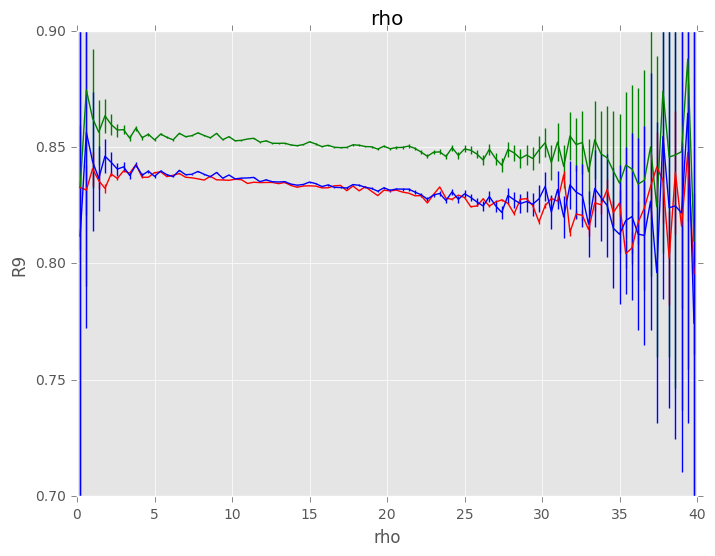

In [7]:
for yvar in ["R9"]:#, "S4", "SigmaIeIe", "EtaWidth"]:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar

    if yvar == "R9":
        minEB, maxEB = 0.7, 0.9
        minEE, maxEE = 0.7, 0.9
    

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('ScEta')
    ax.set_ylabel(yvar)
    
    
    ax.axvline(x=1.5)
    ax.axvline(x=-1.5)
    
    
    plot.Profile(dfmc['ScEta']  , dfmc[yvar]        ,100,-2.5,2.5,ax,'green',dfmc['weight'])
    plot.Profile(dfdata['ScEta'], dfdata[yvar]      ,100,-2.5,2.5,ax, 'red',dfdata["weight"])
    plot.Profile(dfmc['ScEta']  , dfmc[yvar+'_corr'],100,-2.5,2.5,ax, 'blue',dfmc['weight'])
    ax.set_title('Eta')   
#---------------------------------------------------------------------------------------------------------
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('Pt')
    ax.set_ylabel(yvar)
    

    
    plot.Profile(dfmc['Pt']  , dfmc[yvar]        ,100,20.,90.,ax, 'green',dfmc["weight"])
    plot.Profile(dfdata['Pt'], dfdata[yvar]      ,100,20.,90.,ax, 'red',dfdata["weight"])
    plot.Profile(dfmc['Pt']  , dfmc[yvar+'_corr'],100,20.,90.,ax, 'blue',dfmc["weight"])
    ax.set_title('Pt') 
#---------------------------------------------------------------------------------------------------------
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('rho')
    ax.set_ylabel(yvar)
    
   
    
    plot.Profile(dfmc['rho']  , dfmc[yvar]        ,100,0.,40.,ax, 'green',dfmc["weight"])
    plot.Profile(dfdata['rho'], dfdata[yvar]      ,100,0.,40.,ax, 'red',dfdata["weight"])
    plot.Profile(dfmc['rho']  , dfmc[yvar+'_corr'],100,0.,40.,ax, 'blue',dfmc["weight"])
    ax.set_title('rho') 
